In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ks-projects-201801.csv")

### Main Category

In [3]:
df.main_category.value_counts().sort_values(ascending=False)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

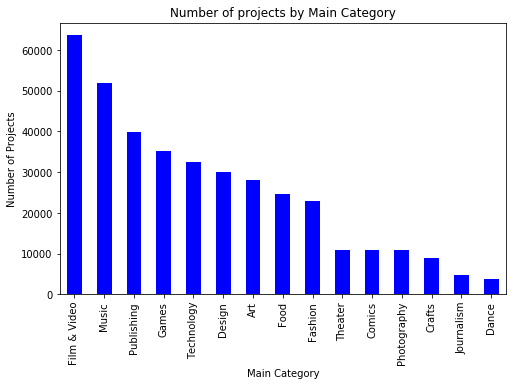

In [4]:
# Number of projects by main category
plt.figure(figsize=(8,5))
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.title('Number of projects by Main Category')
df.main_category.value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

In [5]:
# Calculate the successful rate of each main category
state_main_category_count = pd.crosstab(df['state'],df['main_category'],margins=True)
state_main_category_rate = (state_main_category_count/state_main_category_count.loc['All']*100).round(2)
state_main_category_rate

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
state,,,,,,,,,,,,,,,,
canceled,7.89,7.78,9.57,4.33,13.81,11.61,9.05,8.99,17.60,11.00,6.37,9.15,9.03,14.48,5.57,10.24
failed,50.19,37.30,64.74,32.78,49.27,62.16,51.75,64.91,45.42,65.97,41.90,59.23,58.05,63.30,33.98,52.22
live,0.69,0.70,0.86,0.48,1.01,1.10,0.52,0.75,0.81,0.65,0.54,0.45,0.75,1.16,0.38,0.74
successful,40.88,54.00,24.01,62.05,35.08,24.51,37.15,24.73,35.53,21.28,46.61,30.66,30.85,19.75,59.87,35.38
suspended,0.34,0.21,0.82,0.35,0.82,0.60,0.18,0.62,0.62,1.09,0.29,0.51,0.17,1.30,0.19,0.49
undefined,0.00,0.00,0.00,0.03,0.01,0.01,1.34,0.00,0.00,0.00,4.30,0.01,1.16,0.01,0.01,0.94
All,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


- The above table shows that 'Dance' has highest successfully rate (62.05%) among the main categories
- 'Technology' has the lowest successful rate (19.75%)

In [6]:
# Remove 'All' column and row
state_main_category_rate = state_main_category_rate.drop(['All'],axis=0)
state_main_category_rate = state_main_category_rate.drop(['All'],axis=1)

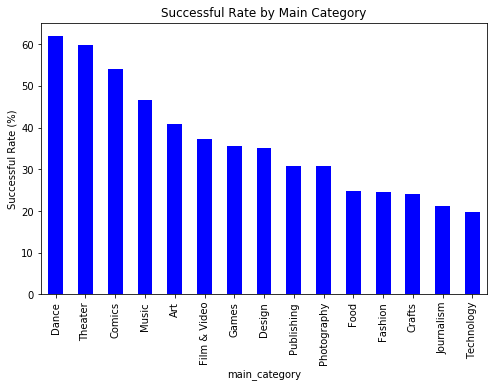

In [7]:
# Successful rate by main category in descending order
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.ylabel('Successful Rate (%)')
plt.title('Successful Rate by Main Category')
state_main_category_rate.loc['successful'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

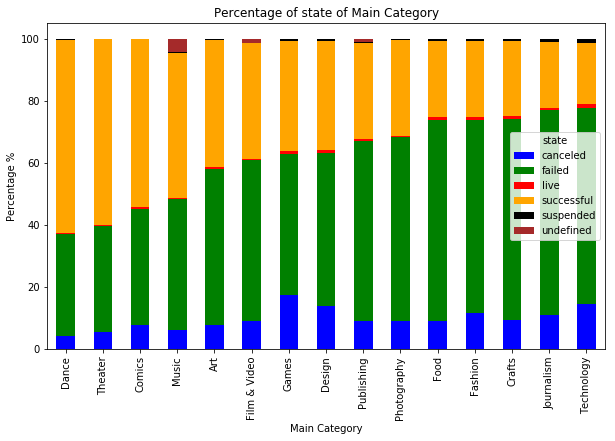

In [8]:
state_main_category_rate.T.sort_values('successful', ascending=False).plot(kind='bar', stacked=True, figsize=(10,6),
                color=['blue','green','red','orange','black','brown'])
plt.title('Percentage of state of Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage %')
plt.show()

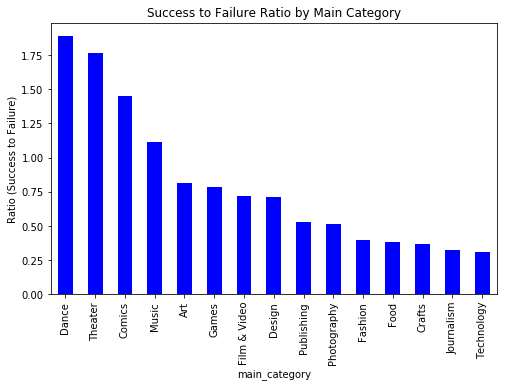

In [9]:
plt.figure(figsize=(8,5))
plt.title('Success to Failure Ratio by Main Category')
plt.ylabel('Ratio (Success to Failure)') 
catPivot = df.pivot_table(index='main_category', columns='state', values='ID', aggfunc='count', margins=False)
catPivot['SFratio'] = catPivot['successful'] / catPivot['failed']
catPivot['SFratio'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

### Category

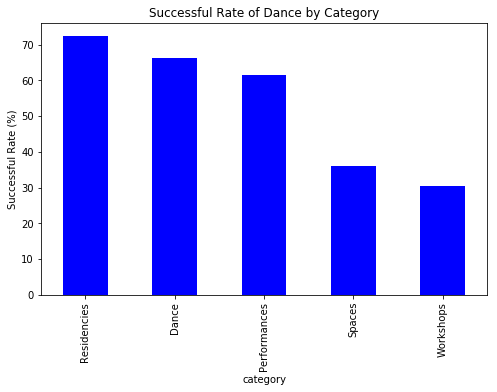

In [10]:
#Individual Main Category
mc = 'Dance'
df_mc = df[df.main_category==mc]
state_category_count = pd.crosstab(df_mc['state'],df_mc['category'],margins=True)
state_category_rate = (state_category_count/state_category_count.loc['All']*100).round(2)
state_category_rate = state_category_rate[state_category_rate.columns[:-1]][:-1]
state_category_rate
# Successful rate by main category in descending order
plt.figure(figsize=(8,5))
# plt.xticks(rotation=90)
plt.ylabel('Successful Rate (%)')
plt.title('Successful Rate of '+ mc +' by Category')
state_category_rate.loc['successful'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

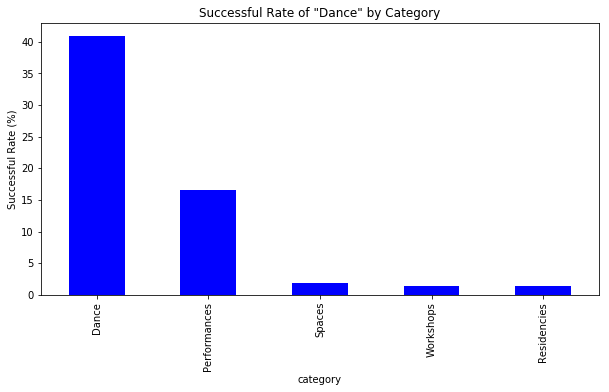

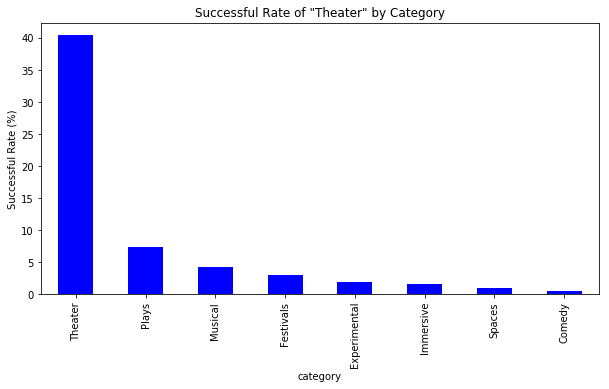

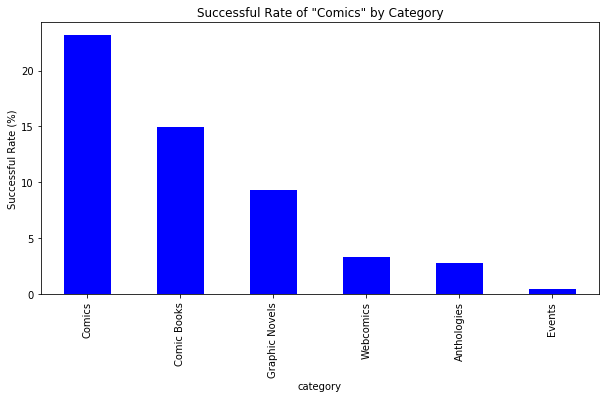

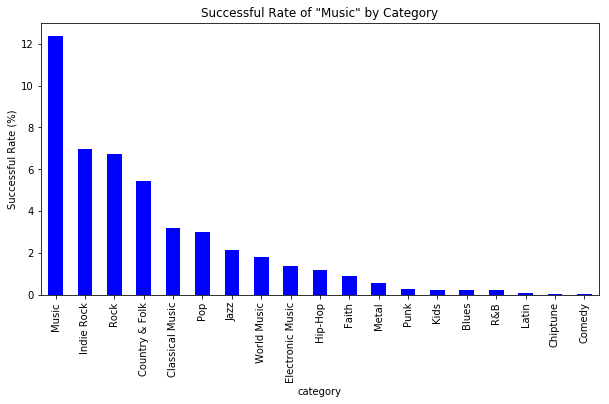

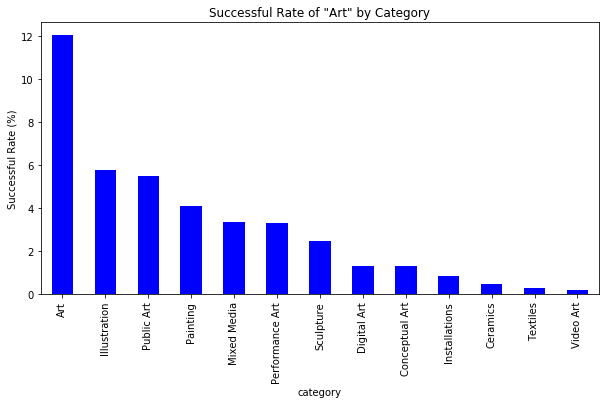

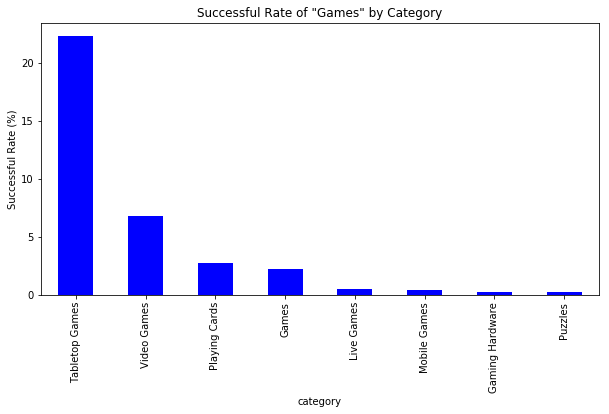

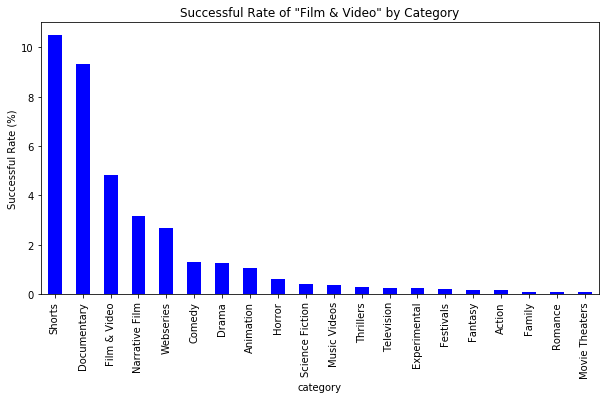

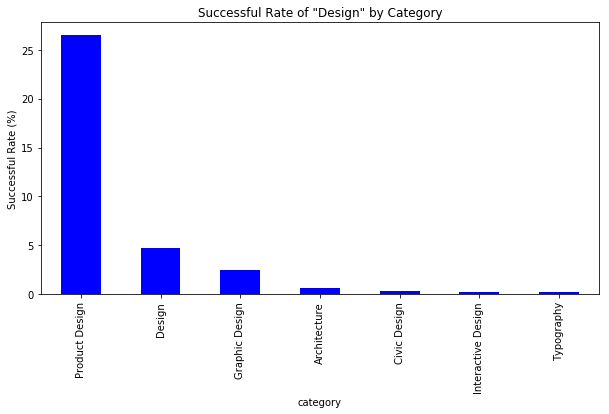

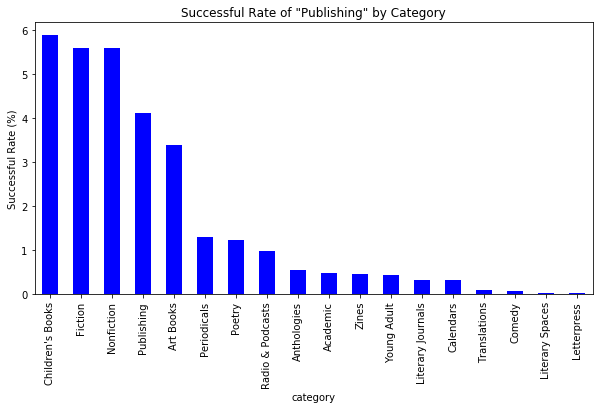

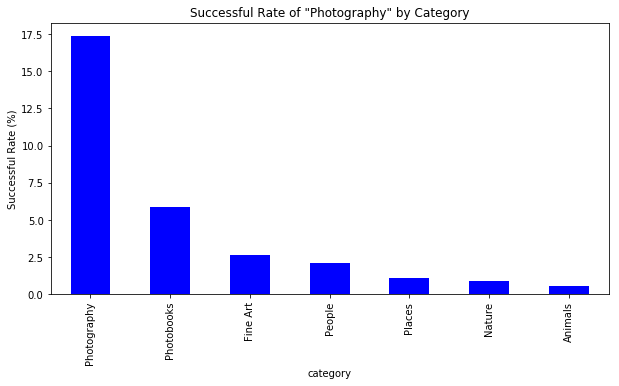

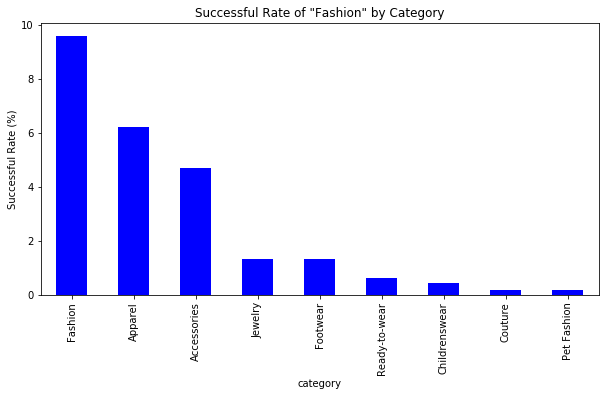

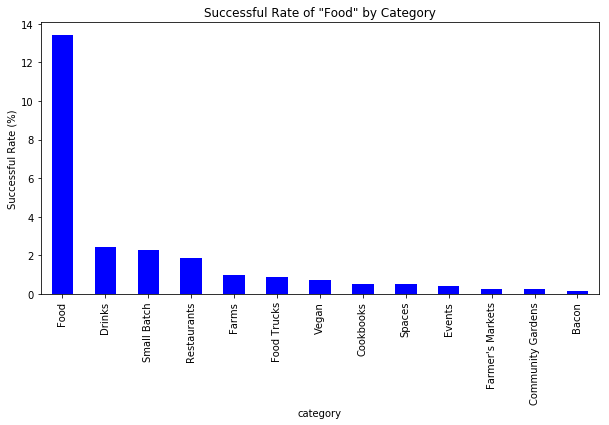

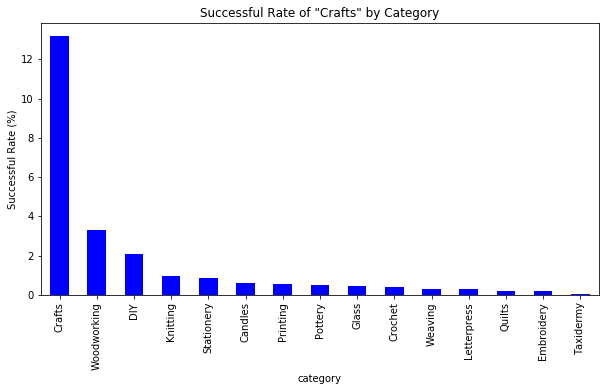

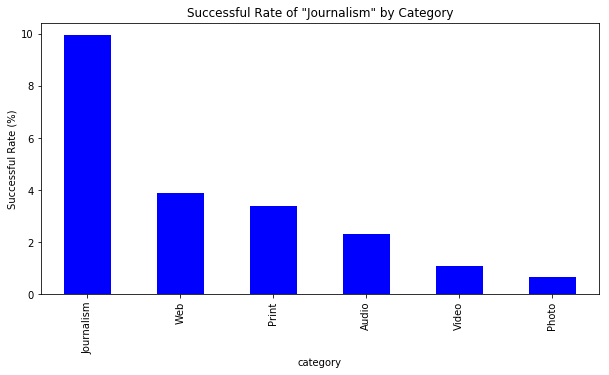

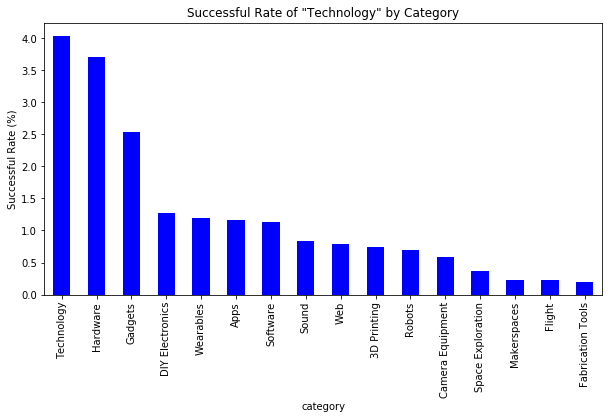

In [11]:
#Loop all Main Categories
mclist = catPivot.sort_values('SFratio', ascending=False).index
for mc in mclist:
    df_mc = df[df.main_category==mc]
    state_category_count = pd.crosstab(df_mc['state'],df_mc['category'],margins=True)
    state_category_rate = (state_category_count/state_category_count.loc['All']['All']*100).round(2)
    state_category_rate = state_category_rate[state_category_rate.columns[:-1]][:-1]
    state_category_rate
    # Successful rate by main category in descending order
    plt.figure(figsize=(10,5))
    #plt.xticks(rotation=90)
    plt.ylabel('Successful Rate (%)')
    plt.title('Successful Rate of '+ '"'+mc+'"' +' by Category')
    state_category_rate.loc['successful'].sort_values(ascending=False).plot(kind='bar', color='blue')
    plt.savefig(mc+'.png')